In [67]:
%matplotlib widget

In [68]:
import time

import numpy as np
import matplotlib.pyplot as plt

from non_dominated_surface import compute_non_dominated_surface, save_non_dominated_surface
from build_model import build_model, get_instance

In [69]:
instance_filename = "medium_instance.json"
data = get_instance(instance_filename)
model = build_model(data, with_epsilon_constraint=True)
t0 = time.time()
non_dominated_models = compute_non_dominated_surface(model, data)
print(f"Time spent: {time.time() - t0}")

max_duration <= 22, max_assigned <= 15
Objective: 412.96400000000006, max_duration: 11, max_assigned: 5

max_duration <= 22, max_assigned <= 4
Objective: 404.9680000000001, max_duration: 12, max_assigned: 4

max_duration <= 22, max_assigned <= 3
Objective: 381.97300000000007, max_duration: 12, max_assigned: 3

max_duration <= 22, max_assigned <= 2
Objective: 325.97800000000007, max_duration: 12, max_assigned: 2

max_duration <= 22, max_assigned <= 1
Objective: 193.98199999999997, max_duration: 13, max_assigned: 1

max_duration <= 12, max_assigned <= 15
Objective: 412.96400000000006, max_duration: 11, max_assigned: 5

max_duration <= 12, max_assigned <= 4
Objective: 404.9680000000001, max_duration: 12, max_assigned: 4

max_duration <= 12, max_assigned <= 3
Objective: 381.97300000000007, max_duration: 12, max_assigned: 3

max_duration <= 12, max_assigned <= 2
Objective: 325.97800000000007, max_duration: 12, max_assigned: 2

max_duration <= 12, max_assigned <= 1
Objective: 193.983, max_du

In [103]:
# Saving results
save_non_dominated_surface(non_dominated_models, instance_filename[:-4] + "pkl")

In [113]:
# from non_dominated_surface import load_non_dominated_surface

# non_dominated_models = load_non_dominated_surface("medium_instance.pkl")

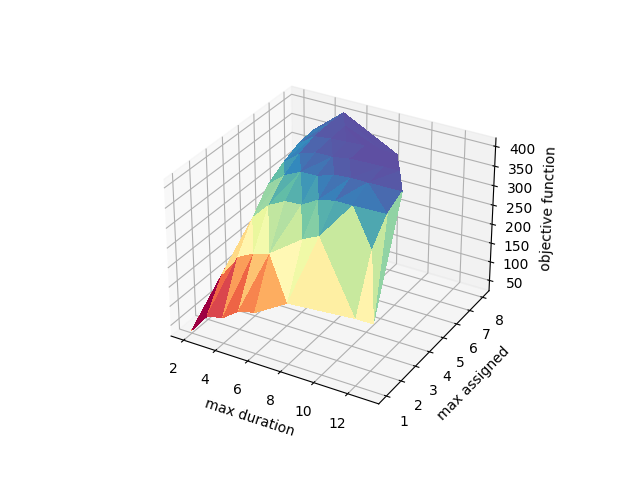

In [114]:
plt.figure().clear()
plt.close()
plt.cla()
plt.clf()

x, y, z = [], [], []

for model in non_dominated_models:
    if model["max_duration"] >= 1 and model["max_assigned"] >= 1 and model["objVal"] > 0:
        x.append(model["max_duration"])
        y.append(model["max_assigned"])
        z.append(model["objVal"])

x = np.array(x)
y = np.array(y)
z = np.array(z)


ax = plt.axes(projection ='3d')
ax.plot_trisurf(x, y, z, cmap=plt.cm.Spectral, antialiased=False)

ax.set_xlabel("max duration")
ax.set_ylabel("max assigned")
ax.set_zlabel("objective function")

plt.show()
